<a href="https://colab.research.google.com/github/Tanjib-Rafi/Multiple-Linear-Regression/blob/main/HousePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/datasets/HousingData.csv')

In [ ]:
df = dataset.dropna()

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,13]
print(X)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
5    0.02985   0.0   2.18   0.0  0.458  6.430  58.7  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
499  0.17783   0.0   9.69   0.0  0.585  5.569  73.5  2.3999    6  391   
500  0.22438   0.0   9.69   0.0  0.585  6.027  79.7  2.4982    6  391   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)
y = sc.fit_transform(y.values.reshape(-1,1))

In [ ]:
X

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89677910e-01, 6.34657837e-02],
       ...,
       [4.37788609e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 2.02814570e-01],
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91250317e-01, 1.31070640e-01]])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2,random_state = 2)
print(X_train.shape)

(315, 13)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=13, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['mean_squared_error'])

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 32)                448       
                                                                 
 dense_28 (Dense)            (None, 16)                528       
                                                                 
 dense_29 (Dense)            (None, 1)                 17        
                                                                 
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4485 - mean_squared_error: 0.4485
Epoch 2/10
10/10 [==============================] - 0s 2ms/step - loss: 0.2101 - mean_squared_error: 0.2101
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - loss: 0.1090 - mean_squared_error: 0.1090
Epoch 4/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0728 - mean_squared_error: 0.0728
Epoch 5/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0566 - mean_squared_error: 0.0566
Epoch 6/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0440 - mean_squared_error: 0.0440
Epoch 7/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0368 - mean_squared_error: 0.0368
Epoch 8/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0321 - mean_squared_error: 0.0321
Epoch 9/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0283 - mean_squared_error: 0.0283
Epoch 10/10
10/10 [=========

In [ ]:
acd = history.history['mean_squared_error']
loss = history.history['loss']

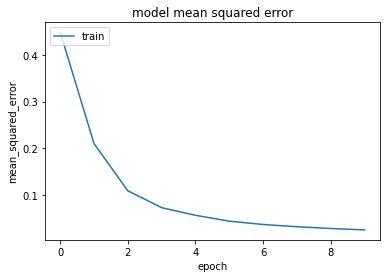

<Figure size 432x288 with 0 Axes>

In [ ]:
from matplotlib import pyplot as plt
plt.plot(acd)
plt.title('model mean squared error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()
plt.savefig('accuracy_curve.png')

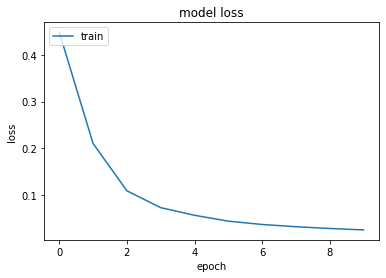

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()
plt.savefig('loss_curve.png')

In [ ]:
history_test = model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.0229 - mean_squared_error: 0.0229


In [ ]:
history_test

[0.022890498861670494, 0.022890498861670494]